# Decision Tree

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [3]:
df=pd.read_csv('/content/diabetes.csv')

**Loading Data**

In [4]:
df.head()
# load dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [5]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

**Splitting Data**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


**Evaluating Model**

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



0.7012987012987013


In [10]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[76 23]
 [23 32]]


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [11]:
!pip install graphviz
!pip install six
!pip install pydotplus

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus



**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy']
}

classifier2 = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=classifier2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 3}
Accuracy: 0.7857142857142857


**Visualizing Decision Trees**

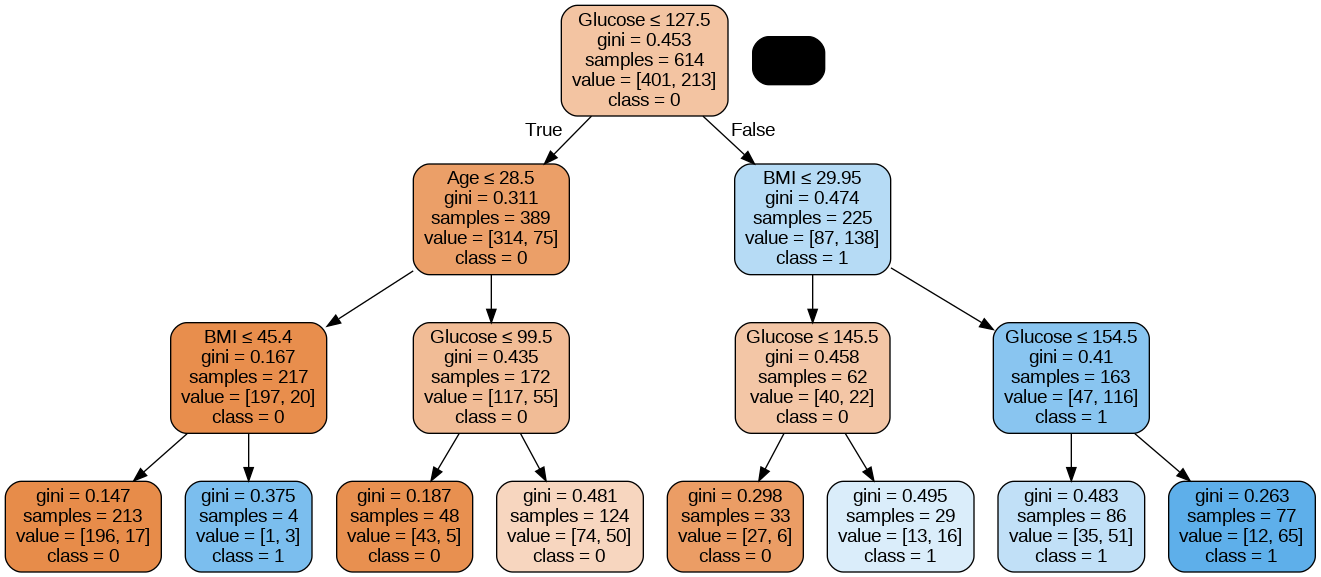

In [15]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(best_clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True, feature_names=X.columns,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


**Implement Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier


In [20]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_train)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy on train",accuracy_rf_train)
print("accuracy on test",accuracy_rf)

accuracy on train 1.0
accuracy on test 0.7987012987012987


In [18]:
accuracy_rf

0.8116883116883117

If the model overfitting try out different way to fix it!!

In [23]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

In [24]:
rf2.fit(X_train, y_train)
y_pred_rf = rf2.predict(X_test)
y_pred_train=rf2.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_train)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy on train",accuracy_rf_train)
print("accuracy on test",accuracy_rf)

accuracy on train 0.9592833876221498
accuracy on test 0.7987012987012987


### All the best!!! I hope you will Enjoy the Task!